In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DoW.csv to DoW.csv
User uploaded file "DoW.csv" with length 21628 bytes


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

# Load Dataset

In [0]:
data = pd.read_csv('DoW.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,23153.939453,23333.179688,23118.300781,23327.460938,23327.460938,288830000
1,2019-01-02,23058.609375,23413.470703,22928.589844,23346.240234,23346.240234,321570000
2,2019-01-03,23176.390625,23176.390625,22638.410156,22686.220703,22686.220703,424240000
3,2019-01-04,22894.919922,23518.640625,22894.919922,23433.160156,23433.160156,396020000
4,2019-01-07,23474.259766,23687.740234,23301.589844,23531.349609,23531.349609,334200000


# Compute Mid Price

In [0]:
high_prices = data['High'].values
low_prices = data['Low'].values

mid_prices = (high_prices + low_prices) / 2

# Create Windows

In [0]:
seq_len = 50
sequence_length = seq_len + 1

result = []

for index in range(len(mid_prices) - sequence_length):
  result.append(mid_prices[index : index + sequence_length])

# Normalize Data

In [0]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((180, 50, 1), (20, 50, 1))

# Build a Model


In [0]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


#Training

In [0]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 180 samples, validate on 20 samples
Epoch 1/20





180/180 [==============================] - 3s 15ms/step - loss: 6.7291e-04 - val_loss: 6.0378e-04
Epoch 2/20
180/180 [==============================] - 1s 7ms/step - loss: 3.3996e-04 - val_loss: 1.1322e-04
Epoch 3/20
180/180 [==============================] - 1s 7ms/step - loss: 2.6914e-04 - val_loss: 1.6812e-04
Epoch 4/20
180/180 [==============================] - 1s 7ms/step - loss: 2.5400e-04 - val_loss: 9.0607e-05
Epoch 5/20
180/180 [==============================] - 1s 7ms/step - loss: 2.1231e-04 - val_loss: 2.0697e-04
Epoch 6/20
180/180 [==============================] - 1s 7ms/step - loss: 2.2468e-04 - val_loss: 2.3981e-04
Epoch 7/20
180/180 [==============================] - 1s 7ms/step - loss: 1.5868e-04 - val_loss: 6.8195e-05
Epoch 8/20
180/180 [==============================] - 1s 7ms/step - loss: 1.6489e-04 - val_loss:

# Prediction

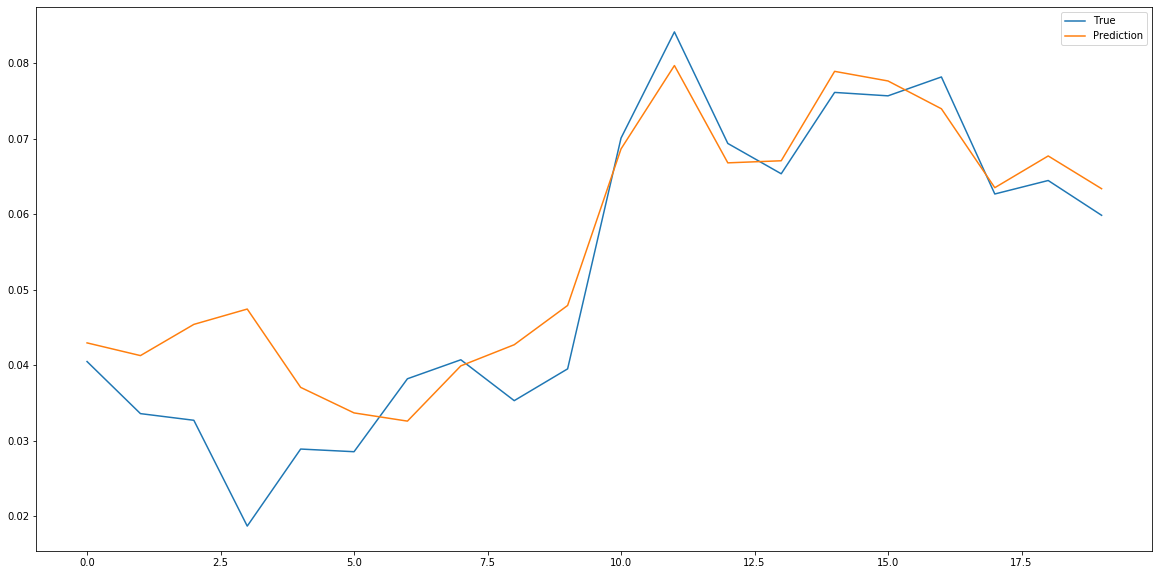

In [0]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()